In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("data/chinook.db")

In [2]:
%load_ext pycodestyle_magic

## Defining some helper functions 

In [3]:
def run_query(q):
    with sqlite3.connect('data/chinook.db') as conn:
        return pd.read_sql(q, conn)


def run_command(q):
    with sqlite3.connect('data/chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(q)


def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ('table','view');
    '''
    return run_query(q)

List of existing tables:

In [4]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


Checking out what's inside:

In [5]:
q = '''
SELECT
    *
FROM genre
LIMIT 1;
'''
run_query(q)

,genre_id,name
0,1,Rock


In [6]:
q = '''
SELECT
    *
FROM invoice_line
LIMIT 1;
'''
run_query(q)

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1


In [7]:
q = '''
SELECT
    *
FROM track
LIMIT 1;
'''
run_query(q)

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99


A query to output the shares of different genres on the market:

In [8]:
q = '''
WITH num_ext AS
    (
    SELECT
        g.name genre,
        SUM(il.quantity) number
    FROM track tr
    INNER JOIN invoice_line il ON il.track_id = tr.track_id
    INNER JOIN genre g ON tr.genre_id = g.genre_id
    GROUP BY g.name
    ORDER BY number DESC
    )

SELECT
    genre,
    number,
    (CAST(number AS FLOAT)*100)/(SELECT SUM(number) FROM num_ext) percentage
FROM num_ext;
'''

df_genre = run_query(q)

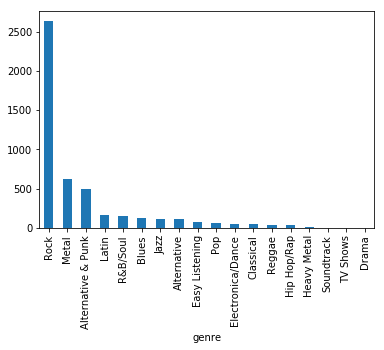

In [9]:
df_genre.set_index("genre", drop=True, inplace=True)
df_genre['number'].plot(kind='bar')

Looking at what's inside some of the other tables:

In [10]:
q = '''
SELECT
    *
FROM employee
LIMIT 10;
'''
run_query(q)

,employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2016-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2017-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2017-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [11]:
q = '''
SELECT
    *
FROM invoice_line
LIMIT 1;
'''
run_query(q)

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1


In [12]:
q = '''
SELECT
    *
FROM invoice
LIMIT 1;
'''
run_query(q)

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84


In [13]:
q = '''
SELECT
    *
FROM customer
LIMIT 1;
'''
run_query(q)

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


Query that outputs the total amount of sales by employee:

In [14]:
q = '''
SELECT
    e.first_name || ' ' || e.last_name employee_name,
    SUM(iv.total) sales
FROM customer c
INNER JOIN invoice iv ON iv.customer_id = c.customer_id
LEFT JOIN employee e ON e.employee_id = c.support_rep_id
GROUP BY c.support_rep_id
ORDER BY employee_name;
'''

df_employee = run_query(q)

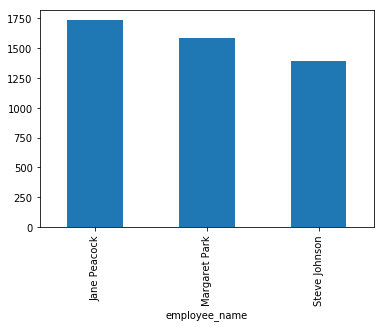

In [15]:
df_employee.set_index("employee_name", drop=True, inplace=True)
df_employee['sales'].plot(kind='bar')
plt.show()

Sales distribution by country:

In [20]:
q = '''
WITH c_view AS
    (
    SELECT
        c.country,
        SUM(i.total) total_amount,
        COUNT(c.customer_id) num_of_customers
    FROM customer c
    INNER JOIN invoice i ON i.customer_id = c.customer_id
    GROUP BY c.country
    )
    SELECT
        *,
        total_amount / (SELECT SUM(total_amount) FROM c_view) percentage,
        total_amount / num_of_customers average_order
    FROM c_view
    ORDER BY percentage DESC
'''
df_country = run_query(q)
run_query(q).head()

,country,total_amount,num_of_customers,percentage,average_order
0,USA,1040.49,131,0.220938,7.942672
1,Canada,535.59,76,0.113727,7.047237
2,Brazil,427.68,61,0.090814,7.011148
3,France,389.07,50,0.082615,7.781400
4,Germany,334.62,41,0.071053,8.161463


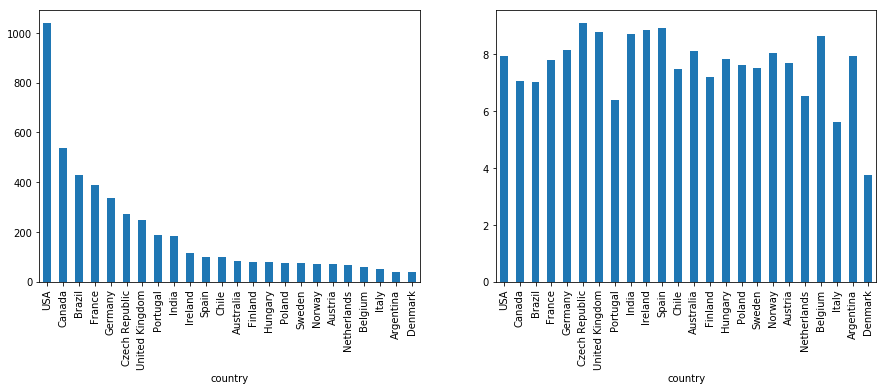

In [21]:
df_country.set_index("country", drop=True, inplace=True)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

df_country['total_amount'].plot(kind='bar', ax=ax1)
df_country['average_order'].plot(kind='bar', ax=ax2)
plt.show()

Track db:

In [22]:
q = '''
SELECT
    *
FROM track
'''
run_query(q).head()

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


Creating a view with track, album, and invoice info:

In [128]:
c = '''
CREATE VIEW IF NOT EXISTS album_select AS
    SELECT
        il.invoice_id,
        tr.track_id,
        tr.album_id
    FROM invoice_line il
    INNER JOIN track tr ON tr.track_id = il.track_id
'''
run_command(c)

Creating a view with the number of tracks in each album:

In [129]:
c = '''
CREATE VIEW IF NOT EXISTS al_tracks AS
    SELECT 
        tr.album_id,
        COUNT(tr.track_id) tracks
    FROM track tr
    GROUP BY tr.album_id
'''
run_command(c)

Comparing the number of tracks in album vs the number of bought tracks to determine whether a whole album has been bought:

In [130]:
q = '''
WITH track_count AS
    (
    SELECT 
        a_s.invoice_id,
        a_s.album_id,
        (SELECT
            COUNT(al.track_id)
        FROM album_select al
        WHERE (al.album_id = a_s.album_id) AND (al.invoice_id = a_s.invoice_id)) bought_tracks,
        al_t.tracks tracks_in_album

    FROM album_select a_s
    INNER JOIN al_tracks al_t ON al_t.album_id = a_s.album_id
    GROUP BY invoice_id, a_s.album_id
    )
    
SELECT
    *,
    CASE
        WHEN bought_tracks=tracks_in_album THEN 1
        ELSE 0
    END bought_all
FROM track_count
'''
track_df = run_query(q)

In [131]:
track_df.head()

,invoice_id,album_id,bought_tracks,tracks_in_album,bought_all
0,1,91,16,16,1
1,2,20,1,11,0
2,2,34,1,17,0
3,2,39,1,21,0
4,2,66,1,10,0


The percentage of album purchases vs separate track purchases:

In [132]:
track_df['bought_all'].sum() / track_df.shape[0]

0.06727331816704582